In [1]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import torch.tensor as tf
from torch.autograd import Variable
import pickle as pickle
import csv

In [2]:
x_data = [[2.1,0.1], [4.2,0.8], [3.1,0.9], [3.3,0.2]]
y_data = [0.0, 1.0, 0.0, 1.0]
def readFile(dirData):
    array=[]
    with open(dirData, 'rt') as csvFile:
        reader = csv.reader(csvFile)
        for row in reader:
            array.append(row)
    return array
    csvFile.close()
w=np.array(0.01)
stepsize = 1e-2
e=0.01
fRecur=0.0
fRecur1=0.0
alpha=0.9
beta=0.999
scale=1.0507009873554804934193349852946

In [3]:
def sigmoid(z):
    return 1/(1+np.power(np.e,-z))

In [4]:
def forward(x):
    return x * w

In [5]:
# Loss function
def loss(x, y):
    y_pred = sigmoid(forward(x))
    return y*np.log10(y_pred) + (1-y)*np.log10(1-y_pred)

In [6]:
# compute gradient
def gradient(x, y):
    return 2 * x * ((x * w) - y)

In [7]:
def backpropagation(x,y):
    return w- 0.001*gradient(x,y)

In [8]:
def Relu(x):
    return max(x,0)

def Elu(x):
    if x>0:
        return x
    else:
        return alpha*(pow(np.e,x)-1) #alpha = 1.67326
def Selu(x):
    if x>0:
        return x
    else:
        return scale*Elu(x) #Scale =1.0507009873554804934193349852946
def PReLu(x):
    if x>0:
        return x
    else:
        return alpha*x
def LeakyReLu(x):
    if x>0:
        return x
    else:
        return 0.01*x
def HardTanh(x):
    return max(-1,min(1,x))
def TanH(x):
    z=pow(np.e,x)
    return (z-1/z)/(z+1/z)

In [9]:
dirData= "/home/dominic/Desktop/Trainning/Test/diabetes.csv"
file= readFile(dirData)
data=np.array(file)
data=data[1:].astype(float)
test=data[0,0:7].reshape(-1,1)

w= 0
w= 1
w= 2
w= 3
w= 4
w= 5
w= 6
w= 7
w= 8
w= 9
w= 10
[array([71.28545978,         nan,         nan,         inf,         nan,
               inf,  3.61879679]), array([155.63219344,          nan,          nan,          inf,
                nan,          inf,   9.33519713]), array([223.58608102,          nan,          nan,          inf,
                nan,          inf,  14.96792031]), array([278.34687357,          nan,          nan,          inf,
                nan,          inf,  20.521611  ]), array([322.48030302,          nan,          nan,          inf,
                nan,          inf,  25.99998887]), array([357.88494627,          nan,          nan,          inf,
                nan,          inf,  31.40580496]), array([386.95872073,          nan,          nan,          inf,
                nan,          inf,  36.7411052 ]), array([        inf,         nan,         nan,         inf,         nan,
               inf, 42.00749189]), array([        inf,         nan,         nan,

/home/dominic/yes/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/dominic/yes/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/home/dominic/yes/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in add
  # Remove the CWD from sys.path while we load stuff.


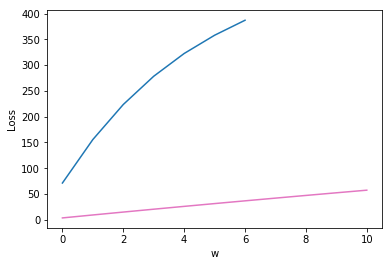

In [10]:
arrW=[]
arrLoss=[]

for layer in np.arange(11):
    print("w=", layer)
    l_sum = 0
    for x_val, y_val in zip(data[:5,0:7], data[:5,7]):
        w=backpropagation(x_val,y_val)
        l = loss(x_val, y_val)
        l_sum += l
#        print("\t", l)
#    print("MSE=", -l_sum / 3)
    arrW.append(w)
    arrLoss.append(l_sum / 3)
print(arrLoss,arrW)
plt.plot(arrLoss)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()